**Project Title**

ML-based Forecasting and Analysis of Agri-Food CO₂ Emissions

**Problem Statement:** The agri-food sector contributes to nearly 62% of global annual CO₂ emissions, making it a critical driver of climate change. However, the complexity of multiple emission sources, such as crop residues, fertilizer use, and food transport, makes it challenging to assess and forecast their impact. There is a need for machine learning approaches to analyze these factors and provide reliable forecasts for climate risk management.

**Description:** This project uses machine learning to study and forecast CO₂ emissions from the agri-food sector. By analyzing factors like agriculture practices, food processing, and population growth, the model identifies key drivers of emissions and predicts future trends. The results aim to support sustainable practices and climate risk reduction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor




In [2]:
df =  pd.read_csv("/kaggle/input/agrifood-emission-dataset/Agrofood_co2_emission.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [3]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [19]:
# Shape and info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape of dataset: (6965, 31)

Data Types:
 Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in or

In [27]:
print("\nstatistics:\n",df.describe())


statistics:
               Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   

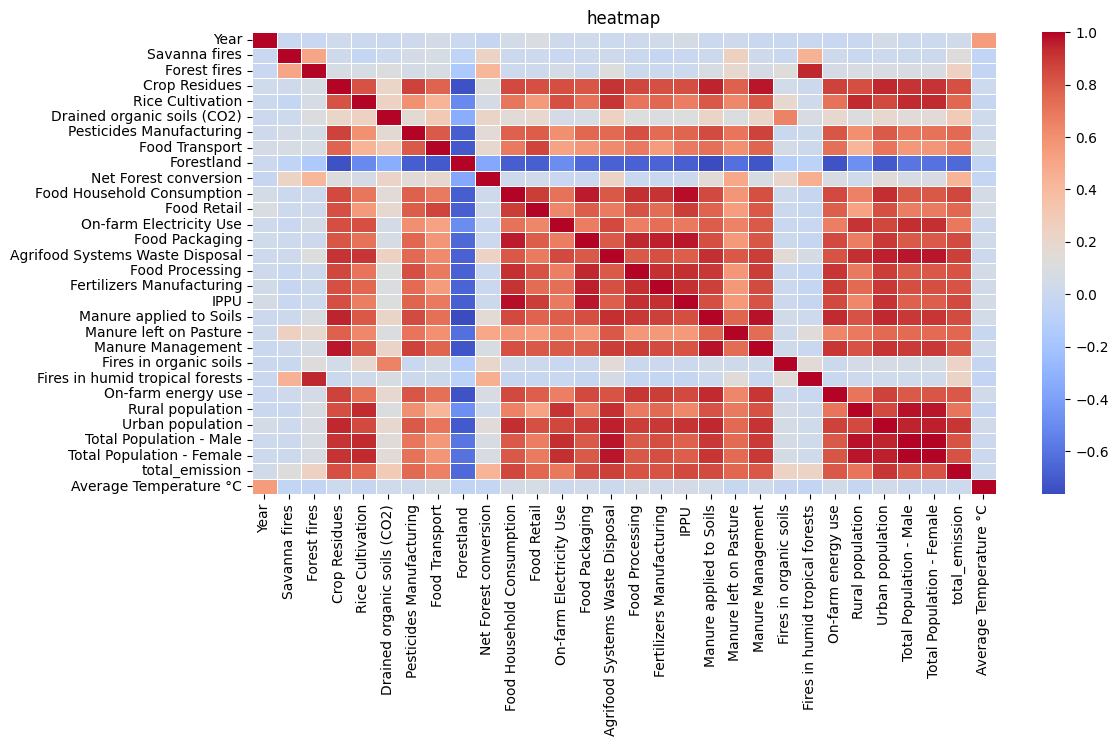

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),linewidths=0.5,annot=False,cmap="coolwarm")
plt.title('heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


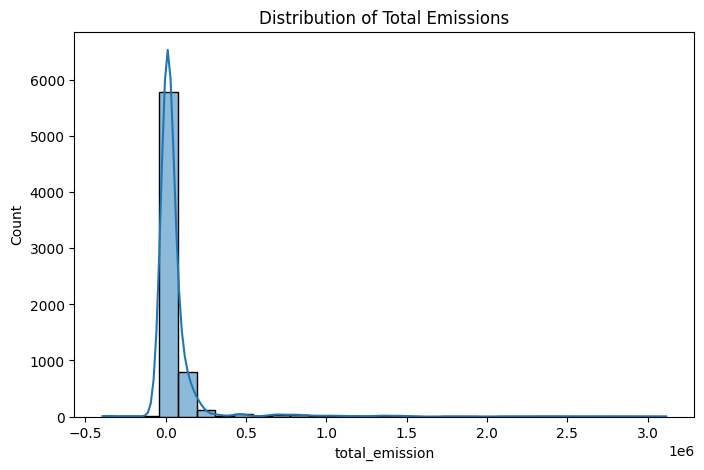

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_emission'], bins=30, kde=True)
plt.title("Distribution of Total Emissions")
plt.show()

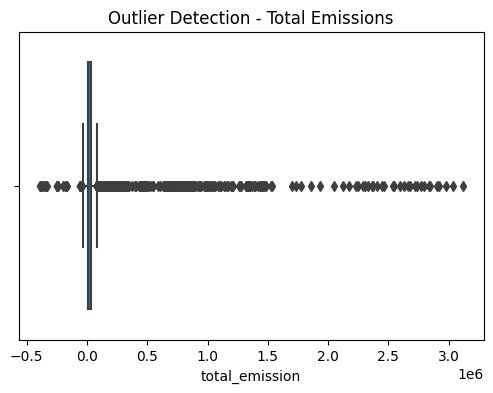

In [40]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
test_df =df[numeric_cols]

# Check for outliers in total_emission
plt.figure(figsize=(6,4))
sns.boxplot(x=test_df['total_emission'])
plt.title("Outlier Detection - Total Emissions")
plt.show()

# Standardize numeric features (except target column)
features = test_df.drop(columns=['total_emission'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['total_emission'] = test_df['total_emission']


In [48]:
# Correlation with target column
correlation = df_scaled.corr()['total_emission'].sort_values(ascending=False)

print("Correlation of features with total_emission:\n")
print(correlation)


Correlation of features with total_emission:

total_emission                     1.000000
Urban population                   0.907774
Agrifood Systems Waste Disposal    0.879840
Food Household Consumption         0.860020
IPPU                               0.848324
Food Packaging                     0.842555
Manure applied to Soils            0.841109
Crop Residues                      0.828031
Total Population - Female          0.823163
Total Population - Male            0.818163
Fertilizers Manufacturing          0.816064
Food Processing                    0.814844
Manure Management                  0.800147
On-farm energy use                 0.795028
Rice Cultivation                   0.756638
Food Retail                        0.755753
Manure left on Pasture             0.755672
Pesticides Manufacturing           0.746777
Rural population                   0.705162
On-farm Electricity Use            0.692060
Food Transport                     0.657877
Net Forest conversion         

In [51]:
# Feature Selection using RandomForest
X = df_scaled.drop(columns=['total_emission'])
y = df_scaled['total_emission']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

Top 10 Important Features for Emissions:

Agrifood Systems Waste Disposal    0.560488
Manure left on Pasture             0.121402
Urban population                   0.063184
IPPU                               0.054031
Food Household Consumption         0.031538
Food Processing                    0.029316
Net Forest conversion              0.028153
Food Packaging                     0.023246
Forestland                         0.012921
Fertilizers Manufacturing          0.012901
dtype: float64


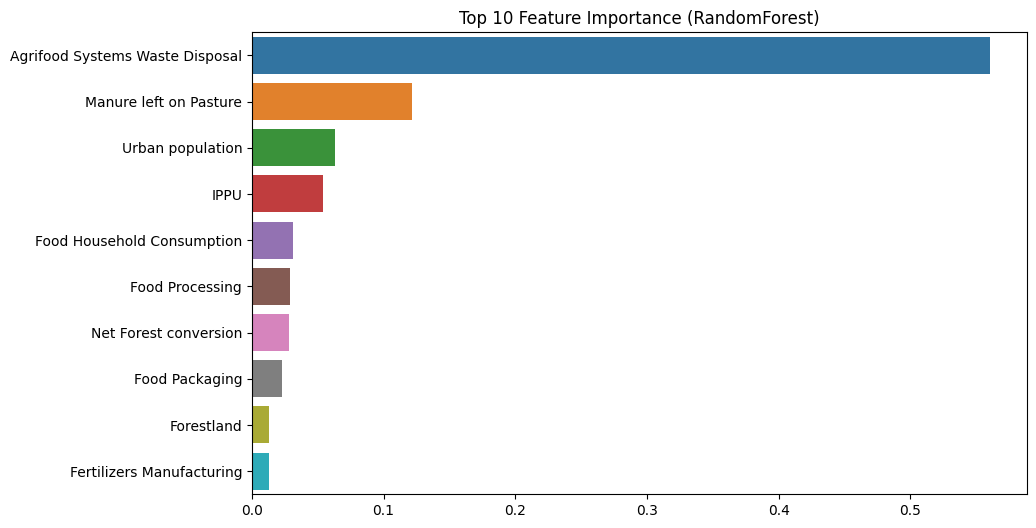

In [52]:
#Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 10 Important Features for Emissions:\n")
print(importances.head(10))

#Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importance (RandomForest)")
plt.show()